In [ ]:
# The ROUGE-1 and ROUGE-2
# scores are based on the overlap of unigrams and bigrams (using words as tokens), respectively, between automatically-generated
# summaries and human-generated summaries. The ROUGE-1 score solely reflects the overlap
# in vocabulary between two summaries, whereas the ROUGE-2 score also reflects overlap in phrase choice
# and to some extent word ordering
# http://www.iro.umontreal.ca/~felipe/TALN2010/Xml/Papers/all/taln2010_submission_24.pdf

In [5]:
import numpy as np
uni_ref=ref_texts['A'].lower().split()
uni_sum=summary_text.lower().split()

p= len(np.intersect1d(uni_ref,uni_sum))/float(len(uni_sum))
p

0.297029702970297

{'rouge_su4_precision': 0.55617, 'rouge_1_precision': 0.57558, 'rouge_4_recall': 0.68243, 'rouge_1_f_score': 0.72883, 'rouge_su4_f_score': 0.70523, 'rouge_3_recall': 0.74074, 'rouge_4_precision': 0.39376, 'rouge_4_f_score': 0.49938, 'rouge_2_recall': 0.90268, 'rouge_3_f_score': 0.54254, 'rouge_3_precision': 0.42802, 'rouge_2_precision': 0.52233, 'rouge_2_f_score': 0.66175, 'rouge_1_recall': 0.99331, 'rouge_su4_recall': 0.96344}


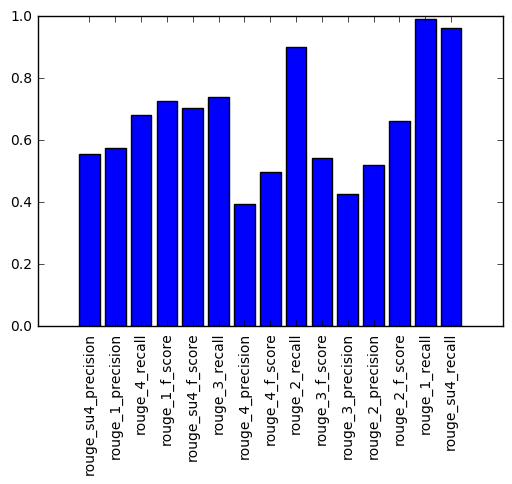

In [10]:
from pyrouge import Rouge155
from __future__ import print_function
%matplotlib inline

from __future__ import print_function
import sys

import matplotlib.pyplot as plt
import nltk
nltk.sent_tokenizer=nltk.data.load('tokenizers/punkt/portuguese.pickle')

def remove_extra_info_from_rouge(d):
    saida ={}
    for key, value in d.iteritems():
        if ("_cb" not in key) and ("_ce" not in key):
            saida[key]=value
    return saida
#como usar o rouge
# ref_texts = { 'A': open('experimentos/01/C1_original.txt', 'r').read().decode('utf-8') }
# summary_text = open('experimentos/01/C1_extrato_wives.txt', 'r').read().decode('utf-8')

ref_texts = { 'A': open('output/experiments/C31_Esportes_Jade - concordanciaCST/extrato_humano.txt', 'r').read().decode('utf-8') }
summary_text = open('output/experiments/C31_Esportes_Jade - concordanciaCST/concept_summ.txt', 'r').read().decode('utf-8')

rouge = Rouge155(rouge_home='/home/ana/anaconda2/lib/python2.7/site-packages/pyrouge/ROUGE-1.5.5')
score = rouge.score_summary(summary_text, ref_texts)
print(remove_extra_info_from_rouge(score))

import matplotlib.pyplot as plt

D = remove_extra_info_from_rouge(score)

plt.bar(range(len(D)), D.values(), align='center')
locs, label = plt.xticks(range(len(D)), D.keys())
plt.setp(label, rotation=90)

plt.show()


In [9]:
from pyrouge import Rouge155
from __future__ import print_function
%matplotlib inline

from __future__ import print_function
import sys
import os, fnmatch

import matplotlib.pyplot as plt
import nltk
nltk.sent_tokenizer=nltk.data.load('tokenizers/punkt/portuguese.pickle')

def remove_extra_info_from_rouge(d):
    saida ={}
    for key, value in d.iteritems():
        if ("_cb" not in key) and ("_ce" not in key):
            saida[key]=value
    return saida

rootdir = 'output'

for subdirs, dirs, files in os.walk(rootdir):
  for dir in dirs:
    for file in os.listdir(os.path.join(subdirs, dir)):
      if fnmatch.fnmatch(file, '*original.txt'):
        ref_texts = { 'A': open(os.path.join(subdirs, dir, 'original.txt'), 'r').read().decode('utf-8') }
        summary_text = open(os.path.join(subdirs, dir, 'extrato_humano.txt'), 'r').read().decode('utf-8')
        rouge = Rouge155(rouge_home='/home/ana/anaconda2/lib/python2.7/site-packages/pyrouge/ROUGE-1.5.5')
        score = rouge.score_summary(summary_text, ref_texts)
        f = open(os.path.join(subdirs, dir, 'rouge_humano.txt'), 'w+')
        f.write(str(remove_extra_info_from_rouge(score)))

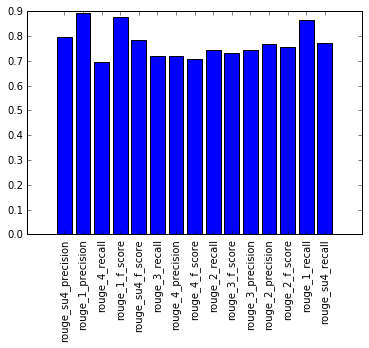

In [7]:
import matplotlib.pyplot as plt

D = remove_extra_info_from_rouge(score)

plt.bar(range(len(D)), D.values(), align='center')
locs, label = plt.xticks(range(len(D)), D.keys())
plt.setp(label, rotation=90)

plt.show()

In [6]:
from pyrouge import Rouge155
from __future__ import print_function
%matplotlib inline

from __future__ import print_function
import sys
import os, fnmatch

import matplotlib.pyplot as plt
import nltk
nltk.sent_tokenizer=nltk.data.load('tokenizers/punkt/portuguese.pickle')

def remove_extra_info_from_rouge(d):
    saida ={}
    for key, value in d.iteritems():
        if ("_cb" not in key) and ("_ce" not in key):
            saida[key]=value
    return saida

rootdir = 'output'

for subdirs, dirs, files in os.walk(rootdir):
  for dir in dirs:
    for file in os.listdir(os.path.join(subdirs, dir)):
      if fnmatch.fnmatch(file, '*original.txt'):
        ref_texts = { 'A': open(os.path.join(subdirs, dir, 'extrato_humano.txt'), 'r').read().decode('utf-8') }
        summary_text = open(os.path.join(subdirs, dir, 'sumario_automatico_CSTSumm.txt'), 'r').read().decode('latin-1')
        rouge = Rouge155(rouge_home='/home/ana/anaconda2/lib/python2.7/site-packages/pyrouge/ROUGE-1.5.5')
        score = rouge.score_summary(summary_text, ref_texts)
        f = open(os.path.join(subdirs, dir, 'rouge_CSTSUmm.txt'), 'w+')
        f.write(str(remove_extra_info_from_rouge(score)))

In [7]:
for subdirs, dirs, files in os.walk(rootdir):
  for dir in dirs:
    for file in os.listdir(os.path.join(subdirs, dir)):
      if fnmatch.fnmatch(file, '*original.txt'):
        ref_texts = { 'A': open(os.path.join(subdirs, dir, 'extrato_humano.txt'), 'r').read().decode('utf-8') }
        summary_text = open(os.path.join(subdirs, dir, 'concept_summ.txt'), 'r').read().decode('latin-1')
        rouge = Rouge155(rouge_home='/home/ana/anaconda2/lib/python2.7/site-packages/pyrouge/ROUGE-1.5.5')
        score = rouge.score_summary(summary_text, ref_texts)
        f = open(os.path.join(subdirs, dir, 'rouge_concept.txt'), 'w+')
        f.write(str(remove_extra_info_from_rouge(score)))